## Process Description

### Dataset
**The data set comes from the Kaggle website which includes 29 attributes and 23 observations.**

### Attributes
**Attributes are in 4 groups, People, Products, Promotion, Place**

**1- People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year

* Education: Customer's education level

* Marital_Status: Customer's marital status

* Income: Customer's yearly household income

* Kidhome: Number of children in customer's household

* Teenhome: Number of teenagers in customer's household

* Dt_Customer: Date of customer's enrollment with the company

* Recency: Number of days since customer's last purchase

* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**2- Products**

* MntWines: Amount spent on wine in last 2 years

* MntFruits: Amount spent on fruits in last 2 years

* MntMeatProducts: Amount spent on meat in last 2 years

* MntFishProducts: Amount spent on fish in last 2 years

* MntSweetProducts: Amount spent on sweets in last 2 years

* MntGoldProds: Amount spent on gold in last 2 years

**3- Promotion**

* NumDealsPurchases: Number of purchases made with a discount

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**4- Place**

* NumWebPurchases: Number of purchases made through the company’s website

* NumCatalogPurchases: Number of purchases made using a catalogue

* NumStorePurchases: Number of purchases made directly in stores

* NumWebVisitsMonth: Number of visits to company’s website in the last month
* NumDealsPurchases

### Target

* 1. Need to perform clustering to summarize customer segments.                        => Clustering
* 2. The need to have a model to identify people into two classes, complainant or not. => Classification


$ \equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv $

# Methodes

### Clustering 

* Kmean

### Classification 

* SVC_Model
* RandomForest_Model
* DecisionTree_Model
* KNN_Model
* Naive_Model

$ \equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv\equiv $

# Clustering Results


### Cluster One

* They are a couple (married or living together) with at least one child (maximum three).
* This group included almost the oldest people. The average age is 57 years old.
* The number of purchase is between 10 and 34 per month. Most of them tend to purchase more than 15 times.
* They earn well. Average income is 62,636.
* Most people tend to visit the website.
* They have higher education.


### Cluster Two

* They do not have children.
* The average age is 54.
* The highest income group.
* Most people tend to visit the website once or twice a month.
* The number of purchase is between 2 and 30 per month.

### Cluster Three

* They are a couple (married or living together) with at least one child (maximum three).
* The average income is lower than the rest of the groups. They are a low-income group.
* Most people tend to visit a website between seven and eight times a month.
* The number of people in the age range of 47 to 50 is more than other age groups.
* The number of purchase is between 3 and 20 per month. Most of them tend to purchase less than 10 times.

### Cluster Four

* There are single parent.
* They have a low average income.(45,813)
* Most people tend to visit the website between five and eight times a month.
* The number of people in the age range of 50 to 52 is more than other age groups.
* The number of purchase is between 1 and 34 per month. Most of them tend to buy once a month.

# Classification Results
* The naive model has the best accuracy, approximately 90%.


In [239]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from colorama import Fore
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np

In [240]:
### This function checks the table and calculates the percentage of missing data for each column
def initial_review_table(df):
    isnull = df.isnull().sum()
    type_columns = df.dtypes
    pre = round((isnull/len(df))*100, 2)
    dc = pd.DataFrame({"Type":type_columns, 
                       "Isnull":isnull, 
                       "Missing data ٪":pre})
    print(dc.sort_values(by = "Missing data ٪", ascending = False))

In [241]:
### This function checks the "association rules" between 2 columns. 
def association_rules(df, col1, col2):
    count_col1 = df[col1][df[col1] > 0].count()
    count_col2 = df[col2][df[col2] > 0].count()
    count_col1_col2 = df[col1][(df[col1] > 0) & (df[col2] > 0) ].count()
    
    pro_col1 = count_col1/len(df)
    pro_col2 = count_col2/len(df)
    support = count_col1_col2/len(df)
    confidence = support/pro_col1
    lift = confidence/pro_col2
    return (round(support*100,1).astype(str) + "%"), (round(confidence*100,1).astype(str) + "%"), lift

def association_table():
    ind, support, confidence, lift=[], [], [], []
    for i in range (len(col_list)):
        for j in range (len(col_list)):
            if i != j:
                ind1 = ""
                asso, conf, lif = association_rules(df, col_list[i], col_list[j])
                ind1 = col_list[i] + " & " + col_list[j]
                support.append(asso)
                confidence.append(conf)
                lift.append(lif)
                ind.append(ind1)
    association_table = pd.DataFrame({"2 different meals relationship": ind, "Support": support, "Confidence": confidence, "Lift": lift})
    return association_table

In [242]:
# This function draws a pie chart for a list of columns for each cluster.
def pie_plt(df,col2):
    columns = ["Education", "Kids", "Marital_Status", "Parent"]
    colors = ["#8690FF", "#ACD0F4", "#30BFDD", "#F7C0BB"]
    fig = plt.figure(figsize=(12, 10), dpi=130)
    
    ax1 = plt.subplot2grid((1, 4), (0, 0))
    c=df.groupby(columns[0]).count()
    labels = c.index
    plt.pie(c[col2],autopct = "%1.1f%%", labeldistance=1.1, shadow=True, colors=colors, labels=c.index)
    title = columns[0]
    plt.title(title, size = 10, color = "k")
    
    ax1 = plt.subplot2grid((1, 4), (0, 1))
    c=df.groupby(columns[1]).count()
    labels = c.index
    plt.pie(c[col2],autopct = "%1.1f%%", labeldistance=1.1, shadow=True, colors=colors, labels=c.index)
    title = columns[1]
    plt.title(title, size = 10, color = "k")
    
    ax1 = plt.subplot2grid((1, 4), (0, 2))
    c=df.groupby(columns[2]).count()
    labels = c.index
    plt.pie(c[col2],autopct = "%1.1f%%", labeldistance=1.1, shadow=True, colors=colors, labels=c.index)
    title = columns[2]
    plt.title(title, size = 10, color = "k")
    
    ax1 = plt.subplot2grid((1, 4), (0, 3))
    c=df.groupby(columns[3]).count()
    labels = c.index
    plt.pie(c[col2],autopct = "%1.1f%%", labeldistance=1.1, shadow=True, colors=colors, labels=c.index)
    title = columns[3]
    plt.title(title, size = 10, color = "k")
    
    plt.show()

In [243]:
###This function draws a histogram plot for a list of columns for each cluster.
def hist_plt(df):
    
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot2grid((1, 4), (0, 0))
    plt.hist(df["Age"], bins=25, edgecolor='black', color="#BC8F8F")
    title = "Age" 
    plt.title(title, size = 10, color = "k")
    
    ax1 = plt.subplot2grid((1, 4), (0, 1))
    plt.hist(df["NumPurchases"], bins=25, edgecolor='black', color="#8B8B00")
    title = "NumPurchases" 
    plt.title(title, size = 10, color = "k")
    
    ax1 = plt.subplot2grid((1, 4), (0, 2))
    plt.hist(df["NumWebVisitsMonth"], bins=25, edgecolor='black', color="#C67171")
    title = "NumWebVisitsMonth" 
    plt.title(title, size = 10, color = "k")
    
    plt.show()

In [244]:
df = pd.read_csv("marketing_campaign (1).csv", sep="\t")
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [245]:
df["Age"] = 2023 - df["Year_Birth"]
df["Kids"] = df["Kidhome"] + df["Teenhome"]
df["Parent"] = df["Kids"]
df["Parent"].replace({2:1,3:1},inplace=True)
df['Cmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df["FamilyCost"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df["Marital_Status"].replace({"Together":1,
                              "Married":2,
                              "Single":0,
                              "Divorced":0,
                              "Widow":0,
                              "Alone":0,
                              "Absurd":0,
                              "YOLO":0},inplace=True)

df["Education"].replace({"Graduation":1,
                         "2n Cycle":1,
                         "Basic":0,
                         "PhD":2,
                         "Master":2},inplace=True)
dm = df.copy()

In [246]:
df.drop(["ID","Dt_Customer","Z_CostContact","Z_Revenue",'AcceptedCmp3',
         'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',"Year_Birth","Recency",
         "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases",
         "Response"],axis = 1, inplace = True)

In [247]:
initial_review_table(df)

                      Type  Isnull  Missing data ٪
Income             float64      24            1.07
Education            int64       0            0.00
Marital_Status       int64       0            0.00
NumWebVisitsMonth    int64       0            0.00
Complain             int64       0            0.00
Age                  int64       0            0.00
Kids                 int64       0            0.00
Parent               int64       0            0.00
Cmp                  int64       0            0.00
NumPurchases         int64       0            0.00
FamilyCost           int64       0            0.00


In [248]:
df.dropna(inplace = True)
dc = df.copy()
df.drop(["Complain"], axis=1, inplace=True)

In [249]:
df = df[df["Age"]<85]
df = df[df["Income"]<= 100000]
df = df[df["NumPurchases"]<35]
df = df[df["NumWebVisitsMonth"]<13]
df.head(4)

,Education,Marital_Status,Income,NumWebVisitsMonth,Age,Kids,Parent,Cmp,NumPurchases,FamilyCost
0,1,0,58138.0,7,66,0,0,0,25,1617
1,1,0,46344.0,5,69,2,1,0,6,27
2,1,1,71613.0,4,58,0,0,0,21,776
3,1,1,26646.0,6,39,1,1,0,8,53


# Clustering

In [250]:
x = df
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), columns=x.columns)

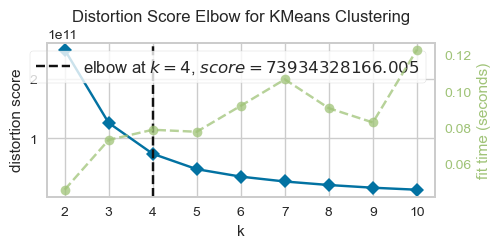

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [251]:
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

plt.figure(figsize=(5, 2))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(df)
elbow_graph.show()

In [252]:
kmeans = KMeans(n_clusters=4, random_state=1202) 
kmeans.fit(x)
centroids = kmeans.cluster_centers_
pred = kmeans.predict(x)

In [253]:
clustering_table = x
clustering_table["lable"] = kmeans.labels_
df["lable"] = kmeans.labels_
cluster_one = df[df["lable"]==0]
cluster_two = df[df["lable"]==1]
cluster_three = df[df["lable"]==2]
cluster_four = df[df["lable"]==3]

In [254]:
y = pd.DataFrame({"Cluster":["one","two","three","four"],"Age-Average":[round(cluster_one["Age"].mean()),
                round(cluster_two["Age"].mean()),
                round(cluster_three["Age"].mean()),
                round(cluster_four["Age"].mean())],
               "Parent":[round(cluster_one["Parent"].min()),
                round(cluster_two["Parent"].min()),
                round(cluster_three["Parent"].min()),
                round(cluster_four["Parent"].min())],
                "Income-Average":[round(cluster_one["Income"].mean()),
                round(cluster_two["Income"].mean()),
                round(cluster_three["Income"].mean()),
                round(cluster_four["Income"].mean())],
                 "Marital_Status-Average":[round(cluster_one["Marital_Status"].mean()),
                round(cluster_two["Marital_Status"].mean()),
                round(cluster_three["Marital_Status"].mean()),
                round(cluster_four["Marital_Status"].mean())],
                 "Marital_Status-Min":[round(cluster_one["Marital_Status"].min()),
                round(cluster_two["Marital_Status"].min()),
                round(cluster_three["Marital_Status"].min()),
                round(cluster_four["Marital_Status"].min())],
                 "Marital_Status-Max":[round(cluster_one["Marital_Status"].max()),
                round(cluster_two["Marital_Status"].max()),
                round(cluster_three["Marital_Status"].max()),
                round(cluster_four["Marital_Status"].max())],
                "FamilyCost-Average":[round(cluster_one["FamilyCost"].mean()),
                round(cluster_two["FamilyCost"].mean()),
                round(cluster_three["FamilyCost"].mean()),
                round(cluster_four["FamilyCost"].mean())]

               })
y

,Cluster,Age-Average,Parent,Income-Average,Marital_Status-Average,Marital_Status-Min,Marital_Status-Max,FamilyCost-Average
0,one,57,1,62636,2,1,2,864
1,two,54,0,65157,1,0,2,1112
2,three,52,1,36017,2,1,2,111
3,four,54,1,45813,0,0,0,396


### Cluster One

* They are a couple (married or living together) with at least one child (maximum three).
* This group included almost the oldest people. The average age is 57 years old.
* The number of purchase is between 10 and 34 per month. Most of them tend to purchase more than 15 times.
* They earn well. Average income is 62,636.
* Most people tend to visit the website.
* They have higher education.

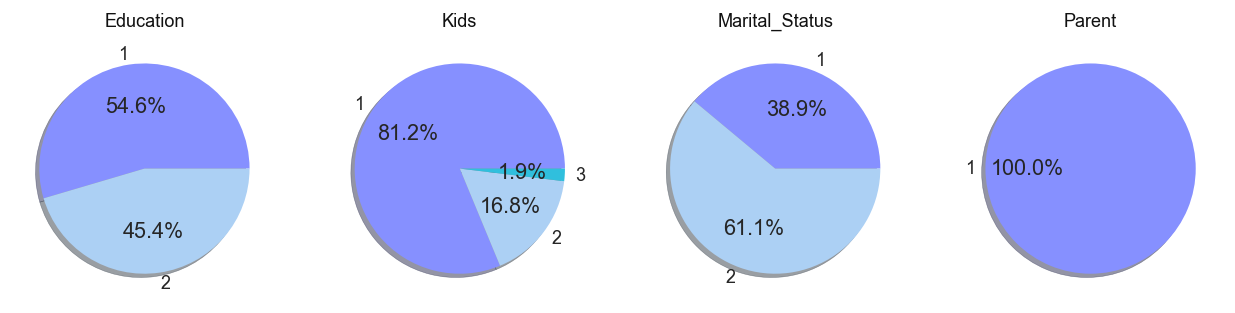

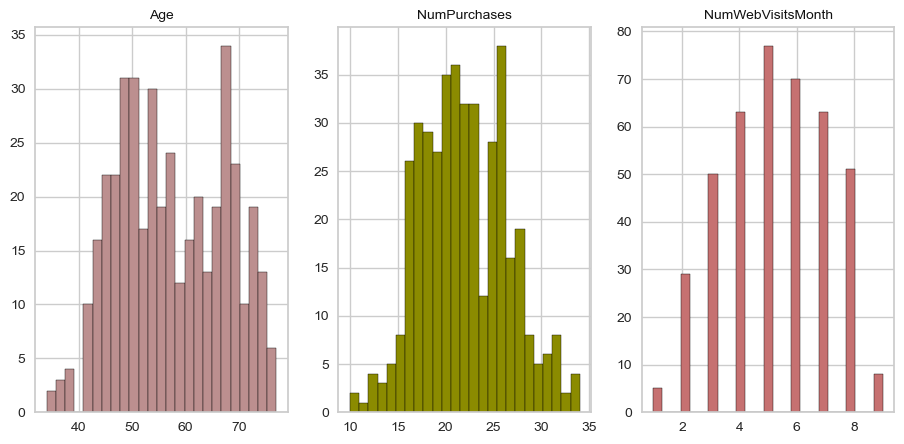

(None, None)

In [255]:
pie_plt(cluster_one,"lable"), hist_plt(cluster_one)

### Cluster Two

* They do not have children.
* The average age is 54.
* The highest income group.
* Most people tend to visit the website once or twice a month.
* The number of purchase is between 2 and 30 per month.


In [256]:
y.iloc[1:2]

,Cluster,Age-Average,Parent,Income-Average,Marital_Status-Average,Marital_Status-Min,Marital_Status-Max,FamilyCost-Average
1,two,54,0,65157,1,0,2,1112


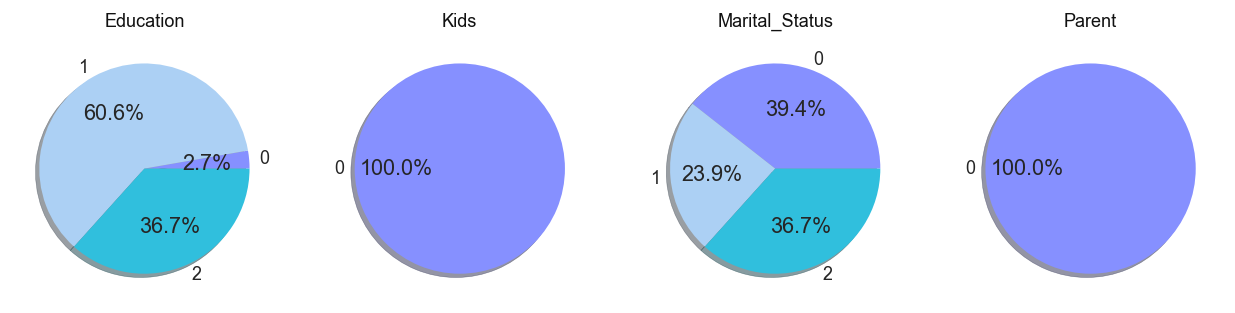

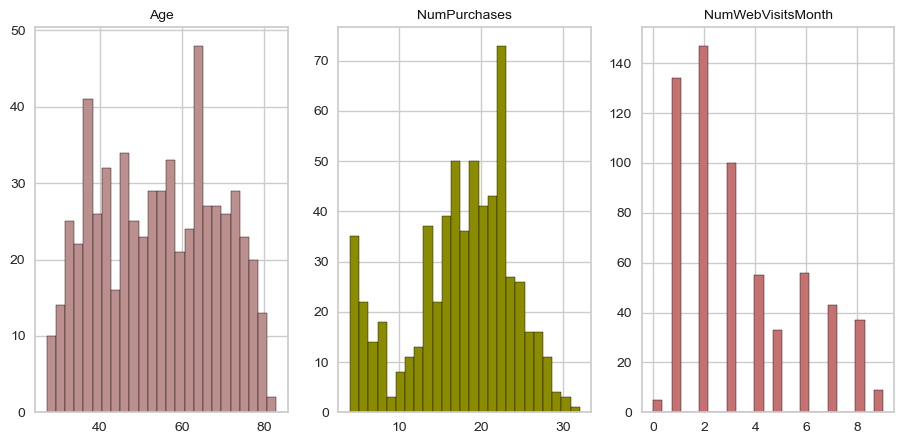

(None, None)

In [257]:
pie_plt(cluster_two,"lable"), hist_plt(cluster_two)

### Cluster Three

* They are a couple (married or living together) with at least one child (maximum three).
* The average income is lower than the rest of the groups. They are a low-income group.
* Most people tend to visit a website between seven and eight times a month.
* The number of people in the age range of 47 to 50 is more than other age groups.
* The number of purchase is between 3 and 20 per month. Most of them tend to purchase less than 10 times.

In [258]:
y.iloc[2:3]

,Cluster,Age-Average,Parent,Income-Average,Marital_Status-Average,Marital_Status-Min,Marital_Status-Max,FamilyCost-Average
2,three,52,1,36017,2,1,2,111


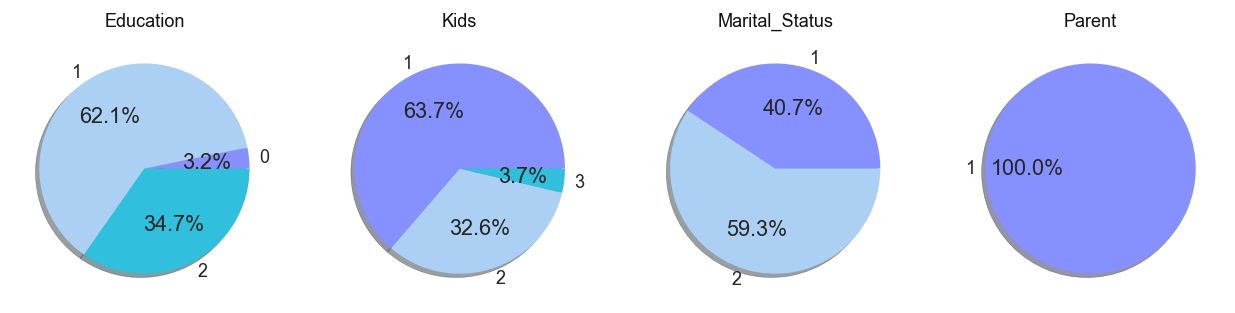

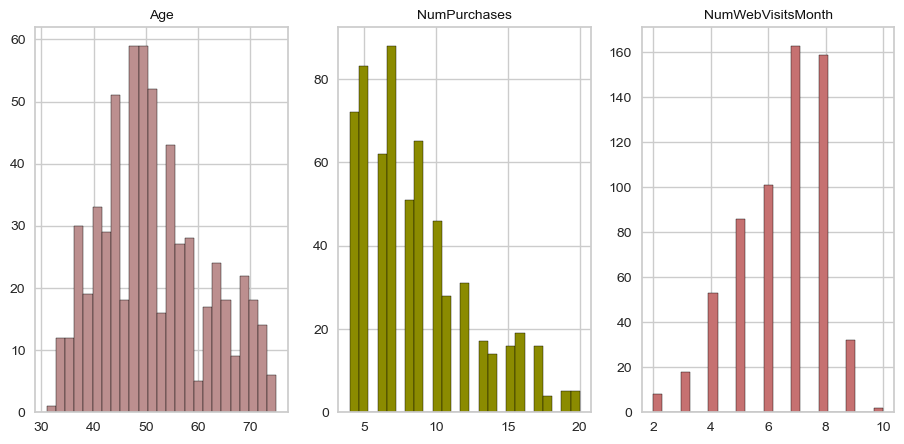

(None, None)

In [259]:
pie_plt(cluster_three,"lable"), hist_plt(cluster_three)

### Cluster Four

* There are single parent.
* They have a low average income.(45,813)
* Most people tend to visit the website between five and eight times a month.
* The number of people in the age range of 50 to 52 is more than other age groups.
* The number of purchase is between 1 and 34 per month. Most of them tend to buy once a month.

In [260]:
y.iloc[3:4]

,Cluster,Age-Average,Parent,Income-Average,Marital_Status-Average,Marital_Status-Min,Marital_Status-Max,FamilyCost-Average
3,four,54,1,45813,0,0,0,396


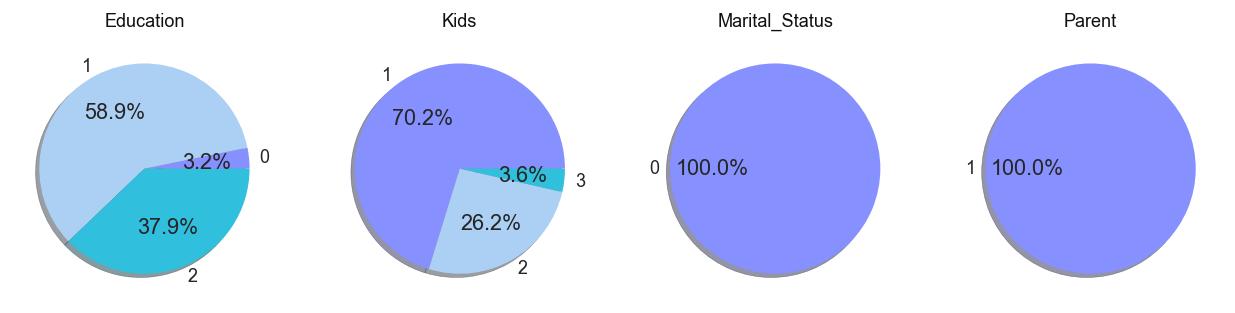

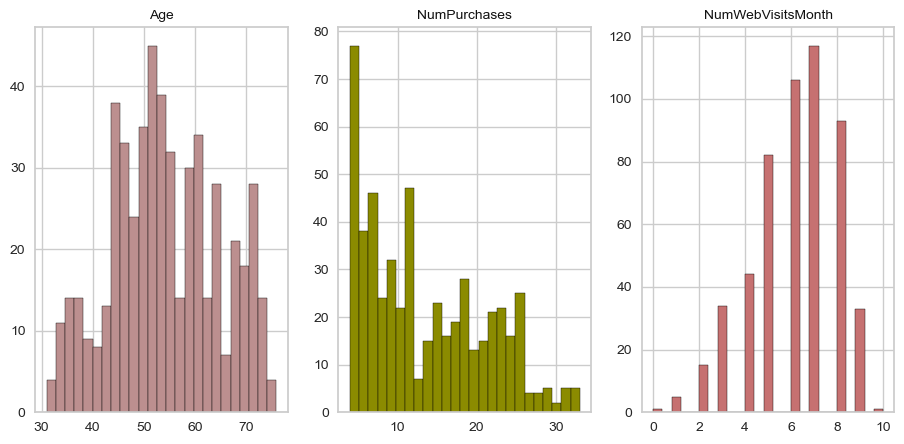

(None, None)

In [261]:
pie_plt(cluster_four,"lable"), hist_plt(cluster_four)

# Classification

**The number of people who complained is 21, which is very low. I randomly select 1% of non-complainants to have a fair sample.**
* test_size = 0.2
* scaler = MinMaxScaler()
* Models: SVC_Model, RandomForest_Model, DecisionTree_Model, KNN_Model, Naive_Model

In [262]:
col_list = dc.columns
col_list = col_list[:-1]
def corr_table(df):
    return round(df.corr(numeric_only=True), 2)
def corr_heatmap(df):
    sns.heatmap(df.corr(numeric_only=True), square  =  True) 
    plt.tick_params(axis='x', rotation=75)
    plt.show ()

In [263]:
corr_table(dc)

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Age,Kids,Parent,Cmp,NumPurchases,FamilyCost
Education,1.00,0.00,0.13,-0.06,-0.04,0.18,0.06,0.02,0.03,0.10,0.09
Marital_Status,0.00,1.00,-0.01,0.01,-0.00,-0.03,0.03,0.05,0.00,0.01,-0.02
Income,0.13,-0.01,1.00,-0.55,-0.03,0.16,-0.29,-0.34,0.31,0.57,0.67
NumWebVisitsMonth,-0.06,0.01,-0.55,1.00,0.02,-0.12,0.42,0.48,-0.17,-0.31,-0.50
Complain,-0.04,-0.00,-0.03,0.02,1.00,0.03,0.03,0.02,-0.02,-0.02,-0.04
Age,0.18,-0.03,0.16,-0.12,0.03,1.00,0.09,-0.01,0.00,0.17,0.11
Kids,0.06,0.03,-0.29,0.42,0.03,0.09,1.00,0.80,-0.25,-0.25,-0.50
Parent,0.02,0.05,-0.34,0.48,0.02,-0.01,0.80,1.00,-0.28,-0.22,-0.52
Cmp,0.03,0.00,0.31,-0.17,-0.02,0.00,-0.25,-0.28,1.00,0.26,0.46
NumPurchases,0.10,0.01,0.57,-0.31,-0.02,0.17,-0.25,-0.22,0.26,1.00,0.76


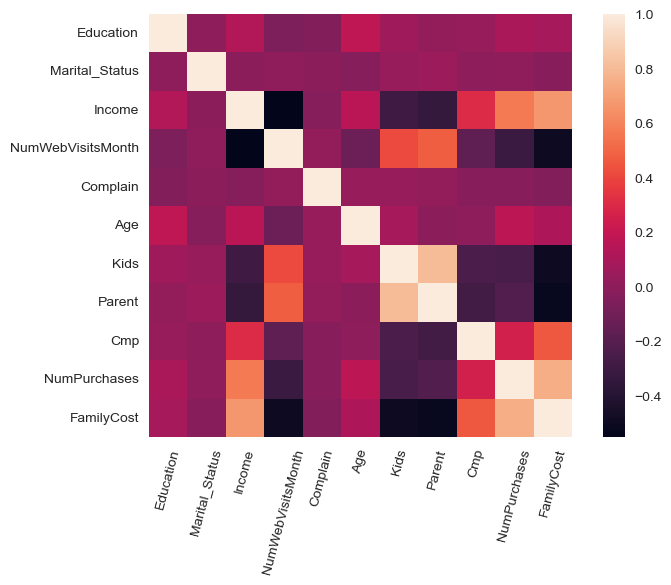

In [264]:
corr_heatmap(dc)

In [265]:
dc.groupby("Complain").count()

,Education,Marital_Status,Income,NumWebVisitsMonth,Age,Kids,Parent,Cmp,NumPurchases,FamilyCost
Complain,,,,,,,,,,
0,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195
1,21,21,21,21,21,21,21,21,21,21


In [266]:
ds = dc.drop(dc.loc[dc["Complain"]==0].sample(frac=0.99).index)
ds["Complain2"] = dc["Complain"]
ds.drop(["Complain"],axis = 1, inplace = True)

In [267]:
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1550)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [268]:
def model(model_function, model_name, x_train, x_test, y_train, y_test,status):
    model = model_function
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    acc = round(accuracy_score(y_test, y_pred), 3)
    print(f'{Fore.MAGENTA}{model_name} result:{Fore.RESET}\n')
    if status == 1:
        print(f'{Fore.RESET}Confusion matrix\tAccuracy\n{cm}\t\t\t{acc}')
        print(14*'___','\n')
    if status == 0:
        ConfusionMatrixDisplay(confusion_matrix = cm).plot()
        plt.show()
    if status == 2:
        importances = model.feature_importances_
        for i in range(len(importances)):
            print("feature: %12s - relative importance: %2.1f %%" % (x.columns[i], importances[i] * 100))
            
model(LinearSVC(),'SVC_Model',x_train, x_test, y_train, y_test,1)
model(RandomForestClassifier(random_state=233),'RandomForest_Model',x_train, x_test, y_train, y_test,1)
model(DecisionTreeClassifier(random_state=1203),'DecisionTree_Model',x_train, x_test, y_train, y_test,1)
model(KNeighborsClassifier(),'KNN_Model',x_train, x_test, y_train, y_test,1)
model(GaussianNB(),'Naive_Model',x_train, x_test, y_train, y_test,1)

SVC_Model result:

Confusion matrix	Accuracy
[[3 2]
 [0 4]]			0.778
__________________________________________ 

RandomForest_Model result:

Confusion matrix	Accuracy
[[2 3]
 [0 4]]			0.667
__________________________________________ 

DecisionTree_Model result:

Confusion matrix	Accuracy
[[0 5]
 [1 3]]			0.333
__________________________________________ 

KNN_Model result:

Confusion matrix	Accuracy
[[3 2]
 [0 4]]			0.778
__________________________________________ 

Naive_Model result:

Confusion matrix	Accuracy
[[4 1]
 [0 4]]			0.889
__________________________________________ 

